In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

import hit_prediction_code.common as common
from hit_prediction_code.dataloaders import EssentiaLoader

dataset_name = 'msd_bb_balanced_essentia'
dataloader = EssentiaLoader(
    dataset_path='../data/processed/'+dataset_name+ '.pickle',
    features=[
        ('hl', 'wide'),
        ('year', 'wide'),
    ],
    label='peak',
    nan_value=150,
)

data, labels = dataloader.load()

/home/mike-uibk/docs/dbis/music/hit-prediction-code/src/hit_prediction_code/dataloaders.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[~mask] = 'one-hit-wonder'


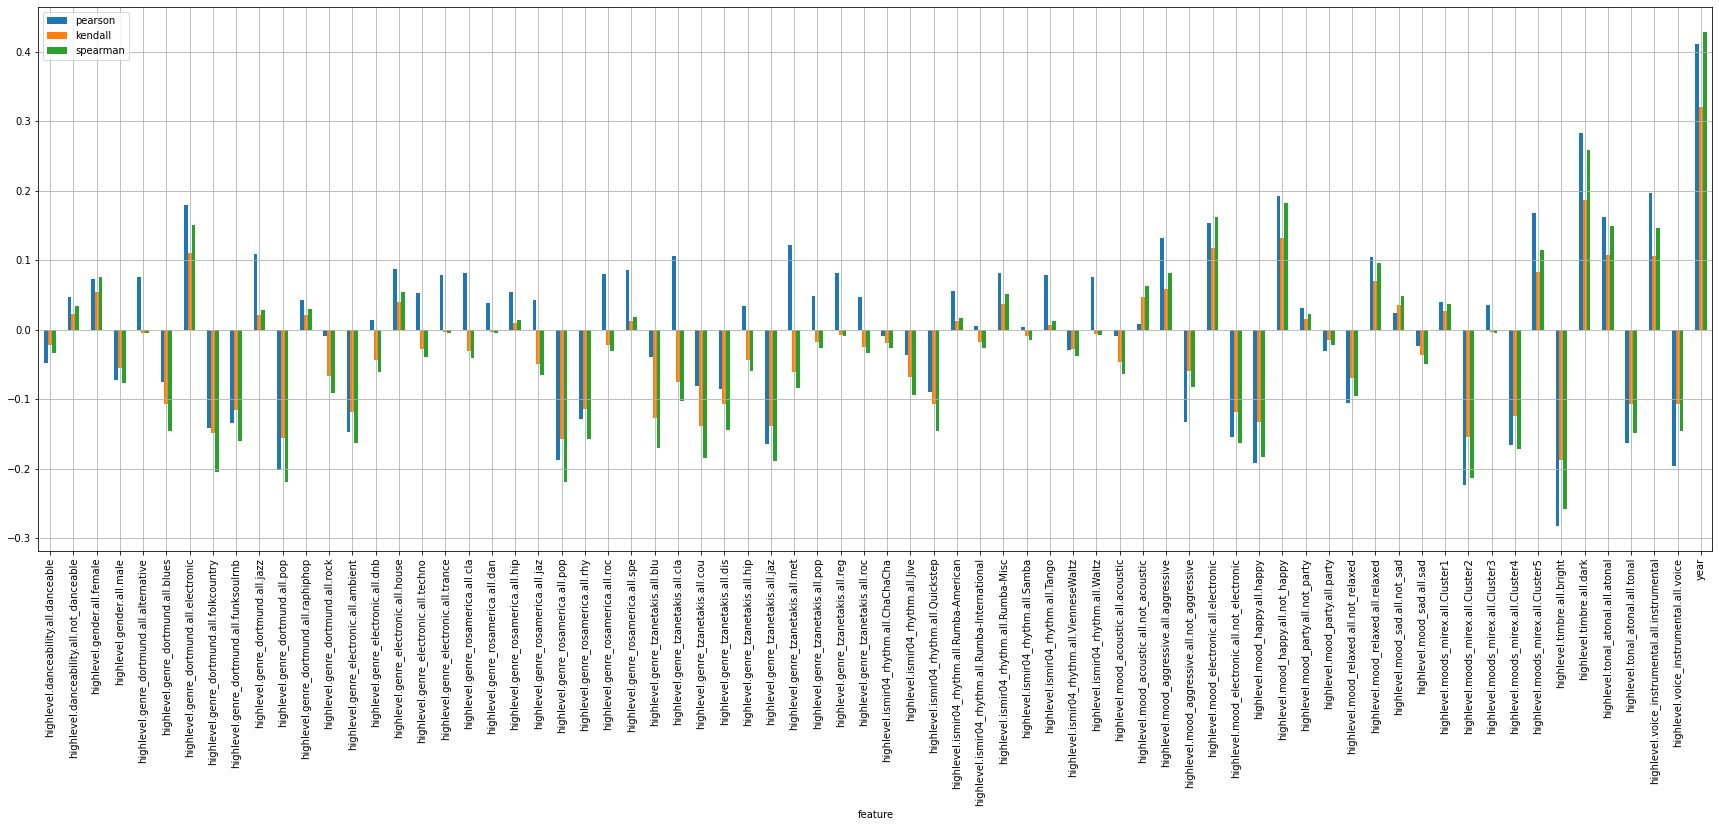

In [2]:
features = map(lambda x: list(zip(x[0][0], x[1][0])), zip(dataloader.configuration['features_list'],dataloader.feature_indices))

correlation = []
for feature_group in features:
    for feature, index in feature_group:
        try:
            correlation.append({'feature': str(feature), 'pearson': scipy.stats.pearsonr(data[:, index], labels)[0], 'kendall': scipy.stats.kendalltau(data[:, index], labels)[0], 'spearman': scipy.stats.spearmanr(data[:, index], labels)[0]})
        except TypeError:
            pass

correlation = pd.DataFrame(correlation).dropna()

correlation.plot.bar(x='feature', grid=True, figsize=(30,10))
plt.savefig('../results/correlation_' + dataset_name + '.pdf')